In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [2]:
df = pd.read_csv('insurance_v4.csv')

In [3]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [6]:
df.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
age                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
charges             1338 non-null float64
sex_female          1338 non-null int64
sex_male            1338 non-null int64
smoker_no           1338 non-null int64
smoker_yes          1338 non-null int64
region_northeast    1338 non-null int64
region_northwest    1338 non-null int64
region_southeast    1338 non-null int64
region_southwest    1338 non-null int64
dtypes: float64(2), int64(10)
memory usage: 125.6 KB


In [8]:
df.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [14]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [6]:
y = np.array(df['charges'])

X = np.array(df[['age', 'bmi', 'sex_male', #wzialem te cechy, ktore najbardziej korelowaly z tabeli pearsona
       'smoker_yes', 'children', 'region_northeast', 'region_southeast']])
y 

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.33, random_state = 33)

In [8]:
x_train.shape

(441, 7)

In [9]:
x_test.shape

(897, 7)

In [10]:
def plot_params_cs_val_score (parameters, model_type):
    for key in parameters.keys():
        scores=[]
        for value in parameters[key]:

            if model_type == 'RandomForestRegressor':
                model = RandomForestRegressor(**{key : value})
            else:
                print('nope')
                return 0

            tmp = np.mean(cross_val_score(model,x_train,y_train, cv=5))
            scores.append(tmp)
        
        x_plot = parameters[key]
        plt.figure(figsize = (10,5))
        plt.title(model_type)
        plt.plot(x_plot,scores)
        plt.xlabel(key)
        plt.ylabel('validation_score')
        plt.show()

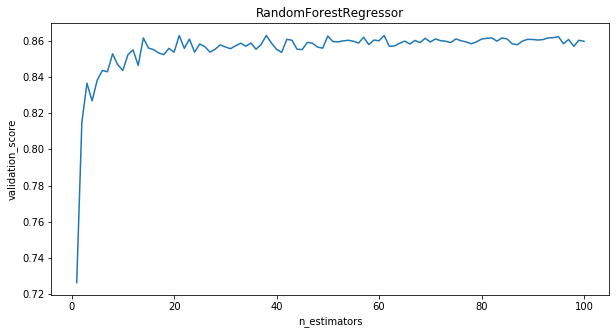

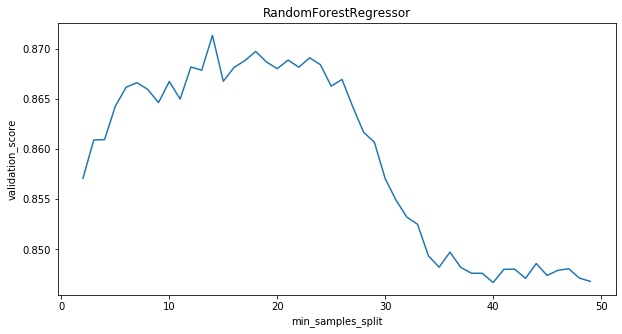

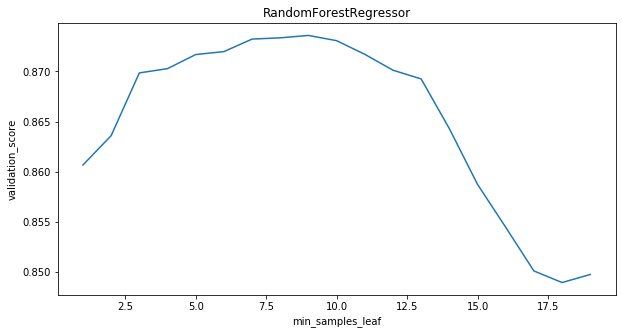

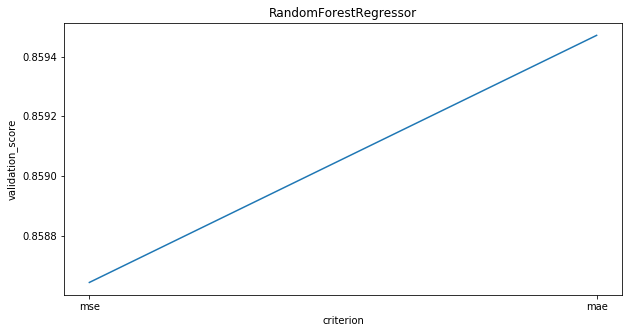

In [11]:
params = {'n_estimators': np.arange(1,101,1),
            'min_samples_split' : np.arange(2,50,1),
            'min_samples_leaf' : np.arange(1,20,1),
            'criterion' : ["mse", "mae"]}

plot_params_cs_val_score(params,model_type = 'RandomForestRegressor')

In [12]:
model = RandomForestRegressor()
params = {'n_estimators': np.arange(10,70,1),
            'min_samples_split' : np.arange(5,25,1),
            'min_samples_leaf' : np.arange(3,14,1),
            'criterion' : ["mse", "mae"]}

grid = GridSearchCV(model, params, cv = 5)
grid.fit(x_train,y_train)
best_par = grid.best_params_
print(best_par)

{'criterion': 'mae', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 21}


In [13]:
model_with_best_par = grid.best_estimator_
model_with_best_par.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=21, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [14]:
cross_val_score(model_with_best_par, x_train, y_train, cv=5).mean()

0.8714178756345576

## SKUTECZNOSC MODELU

In [16]:
yPred = model_with_best_par.predict(x_test)
print('rkwadrat: ',r2_score(y_test, yPred))
print('mse: ', np.round(mean_squared_error(y_test, yPred),3))

rkwadrat:  0.8335782432360532
mse:  22755474.287


im niższy mse tym bliżej do idealnego dopasowania